In [8]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append("..")
from data.utils import distinct_colors

In [9]:
with h5py.File("/space/ariyanzarei/sorghum_segmentation/dataset/TreePartNetData/tree_labeled_test.hdf5") as f:
    points = np.array(f['points'])
    labels = np.array(f['primitive_id'])

with h5py.File("/space/ariyanzarei/sorghum_segmentation/results/TPN_model_test_set/TPN/predictions.hdf5") as f:
    tpn_preds = np.array(f['preds'])

with h5py.File("/space/ariyanzarei/sorghum_segmentation/results/test_set/TPN/predictions.hdf5") as f:
    spn_preds = np.array(f['preds'])
    
print(points.shape)
print(labels.shape)
print(tpn_preds.shape)
print(spn_preds.shape)


(440, 8000, 3)
(440, 8000)
(440, 8000)
(10, 8000)


In [10]:
counter = 0

Text(0.5, 0.92, 'SPN')

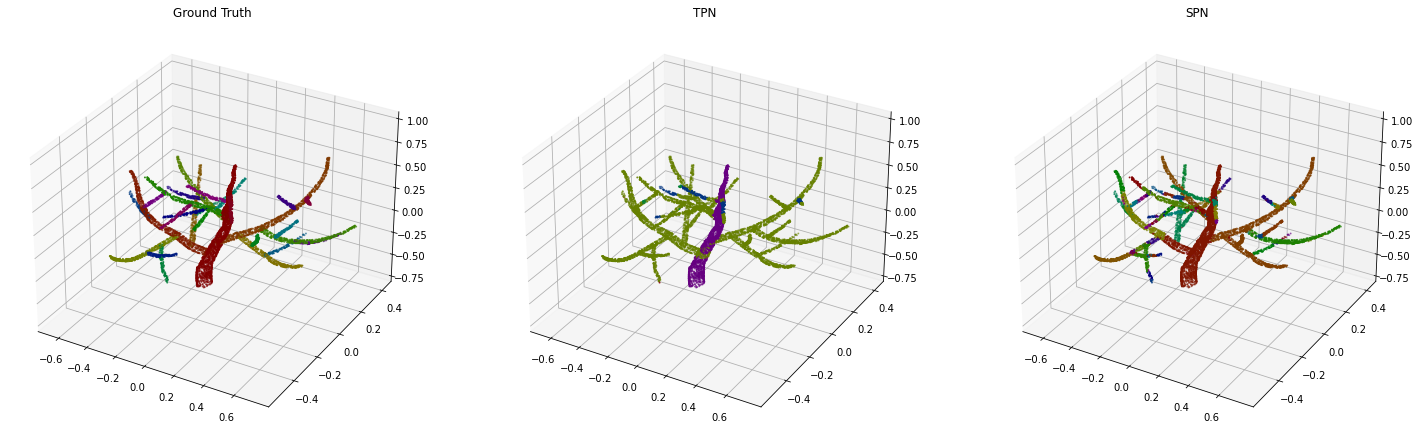

In [19]:
ind = 3
p = points[ind]

rotation_matrix = np.eye(4)
rotation_matrix[1,1] = 0
rotation_matrix[1,2] = 1
rotation_matrix[2,1] = -1
rotation_matrix[2,2] = 0

new_p = np.matmul(np.hstack((p, np.ones((p.shape[0],1)))), rotation_matrix)
p = new_p

labels_gt = labels[ind].squeeze()
labels_tpn = tpn_preds[ind].squeeze()
labels_spn = spn_preds[ind].squeeze()

d_colors = distinct_colors(len(set(labels_gt.tolist())))
colors_gt = np.zeros((labels_gt.shape[0], 3))
for i, l in enumerate(list(set(labels_gt.tolist()))):
    colors_gt[labels_gt == l, :] = d_colors[i]

d_colors = distinct_colors(len(set(labels_tpn.tolist())))
colors_tpn = np.zeros((labels_tpn.shape[0], 3))
for i, l in enumerate(list(set(labels_tpn.tolist()))):
    colors_tpn[labels_tpn == l, :] = d_colors[i]

d_colors = distinct_colors(len(set(labels_spn.tolist())))
colors_spn = np.zeros((labels_spn.shape[0], 3))
for i, l in enumerate(list(set(labels_spn.tolist()))):
    colors_spn[labels_spn == l, :] = d_colors[i]
    
fig = plt.figure(figsize=(25,25))

ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(p[:,0],p[:,1],p[:,2], s=1, c=colors_gt)
ax1.set_title("Ground Truth")

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(p[:,0],p[:,1],p[:,2], s=1, c=colors_tpn)
ax2.set_title("TPN")

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(p[:,0],p[:,1],p[:,2], s=1, c=colors_spn)
ax3.set_title("SPN")